In [29]:
# to import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

from sklearn.ensemble import RandomForestClassifier

In [3]:
#load dataset
df = pd.read_csv('c:\\Users\\HP\\Downloads\\DS-ML\Churn_Modelling.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Churn  
0        101348.88      1  
1        112542.58      0  
2        113931.57      1  
3         93826.63      0  
4         79084.10      0

In [4]:
# getting information about dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Churn            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# more info on rows and collumns
df.shape

(10000, 14)

In [6]:
#information about missing data
round((df.isnull().sum() / df.shape[0]) * 100, 2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Churn              0.0
dtype: float64

In [7]:
# identify collumn data types
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

print('Categorical columns:', cat_col)
print('Numerical columns:', num_col)

Categorical columns: ['Surname', 'Geography', 'Gender']
Numerical columns: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Churn']


In [8]:
#count unique data for categorical data types
df[cat_col].nunique()

Surname      2932
Geography       3
Gender          2
dtype: int64

In [9]:
#statistical summary of dataset
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary         Churn  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [10]:
#correlation analysis
df.corr(numeric_only=True)

RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Churn            -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067       0.007246   0.000599        0.012044   
CustomerId      -0.012419       0.016972  -0.014025        0.001665   
CreditScore      0.006268       0.012238  -0.005458        0.025651   
Age              0.028308      -0.030680  -0.011721        0.085472   
Tenure          -0.012254       0.013444   0.022583       -0.028362   
Balance          1.000000      -0.304180  -0.014858       -0.010084   
NumOfProducts   -0.304180       1.000000   0.003183        0.009612   
HasCrCard       -0.014858       0.003183   1.000000       -0.011866   
IsActiveMember  -0.010084       0.009612  -0.011866        1.000000   
EstimatedSalary  0.012797       0.014204  -0.009933       -0.011421   
Churn            0.118533      -0.047820  -0.007138       -0.156128   

                 EstimatedSalary     Churn  
RowNumber              -0.005988 -0.016571  
CustomerId              0.015271 -0.006248  
CreditScore            -0.001384 -0.027094  
Age                    -0.007201  0.285323  
Tenure                  0.007784 -0.014001  
Balance                 0.012797  0.118533  
NumOfProducts           0.014204 -0.047820  
HasCrCard              -0.009933 -0.007138  
IsActiveMember         -0.011421 -0.156128  
EstimatedSalary         1.000000  0.012097  
Churn                   0.012097  1.000000

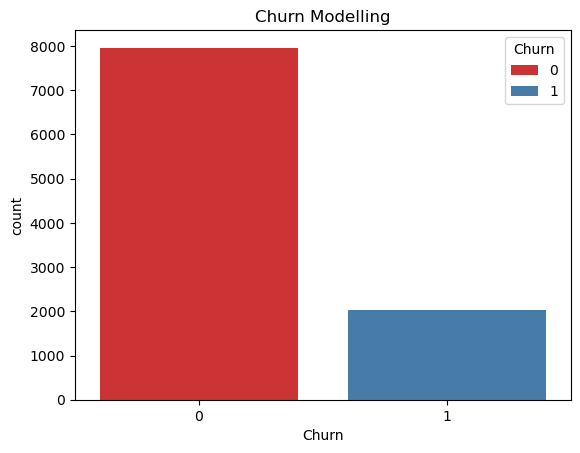

In [11]:
sns.countplot(x='Churn', data=df, hue='Churn', palette='Set1')
plt.title('Churn Modelling')
plt.show()

In [12]:
# generate profiling report 
from ydata_profiling import ProfileReport
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 14/14 [00:00<00:00, 36.68it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

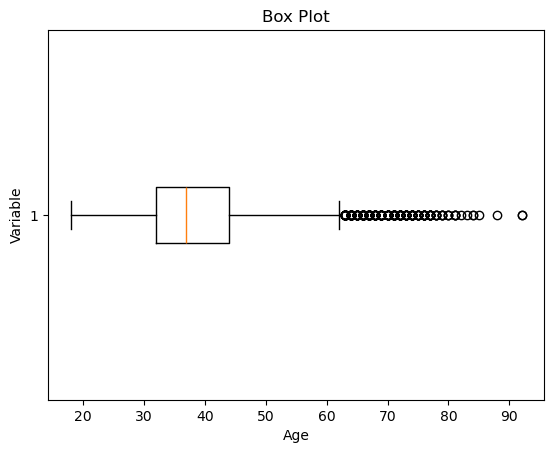

In [13]:
plt.boxplot(df['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

In [14]:
X = df[['CustomerId','Surname','CreditScore', 'Geography','Gender','Age','Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
Y = df['Churn']

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

scaler = MinMaxScaler(feature_range=(0, 1))

x1 = X
num_cols = x1.select_dtypes(include=['int64', 'float64']).columns
x1[num_cols] = scaler.fit_transform(x1[num_cols])

# encoding categorical features
cat_cols = x1.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    x1[cat_cols] = le.fit_transform(x1[cat_cols])
x1.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_8788\4292956829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_cols] = scaler.fit_transform(x1[num_cols])


CustomerId   Surname  CreditScore  Geography  Gender       Age  Tenure  \
0    0.275616  0.380416        0.538        0.0     0.0  0.324324     0.2   
1    0.326454  0.401569        0.516        1.0     0.0  0.310811     0.1   
2    0.214421  0.696008        0.304        0.0     0.0  0.324324     0.8   
3    0.542636  0.098601        0.698        0.0     0.0  0.283784     0.1   
4    0.688778  0.621631        1.000        1.0     0.0  0.337838     0.2   

    Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0  0.000000       0.000000        1.0             1.0         0.506735  
1  0.334031       0.000000        0.0             1.0         0.562709  
2  0.636357       0.666667        1.0             0.0         0.569654  
3  0.000000       0.333333        0.0             0.0         0.469120  
4  0.500246       0.000000        1.0             1.0         0.395400

In [25]:
# standardizing numerical features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(x1)
print(X_standardized[:5])

[[-0.78321342 -0.46418322 -0.32622142 -0.90188624 -1.09598752  0.29351742
  -1.04175968 -1.22584767 -0.91158349  0.64609167  0.97024255  0.02188649]
 [-0.60653412 -0.3909112  -0.44003595  1.51506738 -1.09598752  0.19816383
  -1.38753759  0.11735002 -0.91158349 -1.54776799  0.97024255  0.21653375]
 [-0.99588476  0.62898807 -1.53679418 -0.90188624 -1.09598752  0.29351742
   1.03290776  1.33305335  2.52705662  0.64609167 -1.03067011  0.2406869 ]
 [ 0.14476652 -1.44035563  0.50152063 -0.90188624 -1.09598752  0.00745665
  -1.38753759 -1.22584767  0.80773656 -1.54776799 -1.03067011 -0.10891792]
 [ 0.65265871  0.37135419  2.06388377  1.51506738 -1.09598752  0.38887101
  -1.04175968  0.7857279  -0.91158349  0.64609167  0.97024255 -0.36527578]]


In [26]:
# preparing for train-test split
categorical_features_X = X.select_dtypes(include=['object']).columns.tolist()
numerical_features_X = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features_X),
        ("num", StandardScaler(), numerical_features_X)
    ]
)

In [27]:
# train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [30]:
# building random forest model
rf_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        class_weight='balanced'  # handle imbalanced classes
    ))
])
# Fit
rf_model.fit(X_train, Y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('num', StandardScaler(),
                                                  ['CustomerId', 'Surname',
                                                   'CreditScore', 'Geography',
                                                   'Gender', 'Age', 'Tenure',
                                                   'Balance', 'NumOfProducts',
                                                   'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=300, random_state=42))])

In [31]:
# accuracy and classification report
rf_model.fit(X_train, Y_train)

rf_preds = rf_model.predict(X_test)

print("\n=== RANDOM FOREST RESULTS ===")
print("Accuracy:", accuracy_score(Y_test, rf_preds))
print(classification_report(Y_test, rf_preds))


=== RANDOM FOREST RESULTS ===
Accuracy: 0.8664
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2003
           1       0.81      0.42      0.56       497

    accuracy                           0.87      2500
   macro avg       0.84      0.70      0.74      2500
weighted avg       0.86      0.87      0.85      2500

